In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [123]:
def f(x):
    return np.sin(1/x)

def f_noise(x):
    #return f(x) + np.random.normal(0,0.2)
    return f(x) + np.random.uniform(low=-0.5,high=0.5)

f_noise = np.vectorize(f_noise, otypes=[float])

domain_boundaries = [0.0001,4*np.pi]
step = 0.01

#x determinista
x1 = np.arange(domain_boundaries[0],domain_boundaries[1],step)

#x aleatorio
x = []
for xi in x1:
    if np.random.binomial(1,p=0.6) == 1:
        x.append(xi)

x = np.asarray(x)

y = f_noise(x)
    

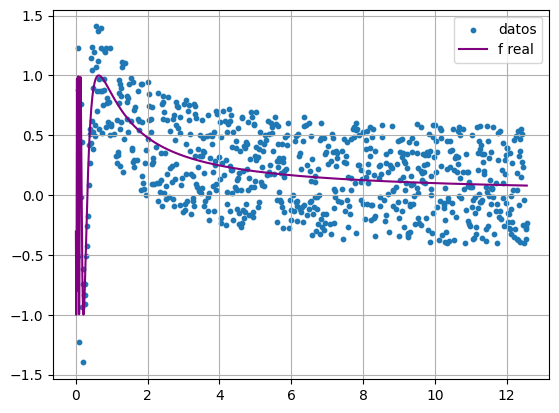

In [124]:
plt.scatter(x,y,s=10,label='datos')
plt.plot(x1,f(x1),color='purple',label='f real')
plt.grid()
plt.legend()
plt.show()

In [125]:
def distance_k_neighbor(x_0,data_x,k):
    shifted_sorted = np.sort(abs(data_x-x_0))
    if(not any(shifted_sorted)):
        print('NO NEIGHBORS')
    return shifted_sorted[k]


def D1(t,lamda):
    if abs(t)<=1:
        return 1/lamda
    else:
        return 0

def h1(x_0,data_x,lamda):
    #x_k = k_neighbor(x_0,data_x,lamda)
    #return abs(x_0-x_k)
    return distance_k_neighbor(x_0,data_x,lamda)


def kernel1(x_0,x,data_x,lamda):
    return D1(abs(x_0-x)/h1(x_0,data_x,lamda),lamda)



In [126]:
def estimator_f_neighbors(x,data_x,data_y,lamda):
    n = len(data_x)
    sum_kernel = 0
    sum_kernel_y = 0
    for i in range(n):
        sum_kernel_y += kernel1(x,data_x[i],data_x,lamda)*data_y[i]
        sum_kernel += kernel1(x,data_x[i],data_x,lamda)
    
    if (sum_kernel==0):
        print('kernel 0:',x)
    #print('1:',sum_kernel,'2:',sum_kernel_y)
    return sum_kernel_y/sum_kernel


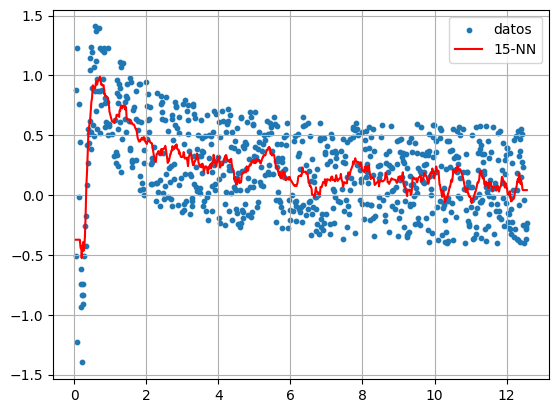

In [127]:
plt.scatter(x,y,s=10,label='datos')
estimate = []

k = int(len(x)/2)
k=1
k=15

for x_i in x:
    estimate.append(estimator_f_neighbors(x_i,x,y,k))
estimate = np.asarray(estimate)

plt.plot(x,estimate,color='red',label='{}-NN'.format(k))
plt.grid()
plt.legend()
plt.show()

In [128]:
def D(t,lamda):
    if abs(t)<=1:
        return (1-abs(t)**3)**3
    else:
        return 0

def h(x_0,data_x,lamda):
    #x_k = k_neighbor(x_0,data_x,lamda)
    #return abs(x_0-x_k)
    return distance_k_neighbor(x_0,data_x,lamda)


def kernel(x_0,x,data_x,lamda):
    return D(abs(x_0-x)/h(x_0,data_x,lamda),lamda)


#GAUSSIANO:
def kernel_gauss(x_0,x,data_x,lamda):
    b = lamda
    return np.exp(-((x_0-x)**2)/(2*b**2))


In [129]:
def smooth_estimator_f(x,data_x,data_y,lamda):
    n = len(data_x)
    sum_kernel = 0
    sum_kernel_y = 0
    for i in range(n):
        ker = kernel(x,data_x[i],data_x,lamda)
        sum_kernel_y += ker*data_y[i]
        sum_kernel += ker
    
    if (sum_kernel==0):
        print('kernel 0:',x)
    #print('1:',sum_kernel,'2:',sum_kernel_y)
    return sum_kernel_y/sum_kernel


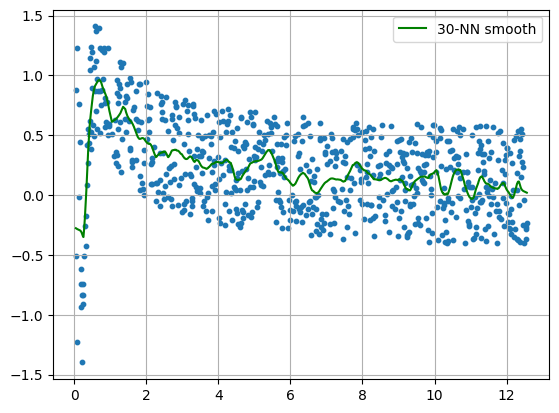

In [130]:
plt.scatter(x,y,s=10)
estimate_neighbors = []

k = int(len(x)/2)
k=30



for x_i in x:
    estimate_neighbors.append(estimator_f_neighbors(x_i,x,y,k))
estimate_neighbors = np.asarray(estimate_neighbors)

estimate_smooth = []


lamda = k

for x_i in x:
    estimate_smooth.append(smooth_estimator_f(x_i,x,y,lamda))
estimate_smooth = np.asarray(estimate_smooth)

#plt.plot(x,estimate_neighbors,color='red',label='{}-NN average'.format(k))
plt.plot(x,estimate_smooth,color='green',label='{}-NN smooth'.format(k))
#plt.plot(x1,f(x1),color='purple',label='f real')
plt.grid()
plt.legend()
plt.show()

In [131]:
def B(data_x):
    B = []
    for i in range(len(data_x)):
        B.append(b(data_x[i]))
    return np.matrix(B)

def b(x):
    return np.asarray([1,x])

def W(x0, data_x, lamda):
    kernels = []
    for x in data_x:
        kernels.append(kernel(x0,x,data_x,lamda))
    return np.diag(np.asarray(kernels))



In [132]:
def lr_smooth_estimator_f(x,data_x,data_y,lamda):
    B1 = B(data_x)
    b1 = b(x)
    W1 = W(x,data_x, lamda)
    y1 = data_y
    result = b1.T@(np.linalg.inv(B1.T@W1@B1))@B1.T@W1@y1
    return result[0,0]

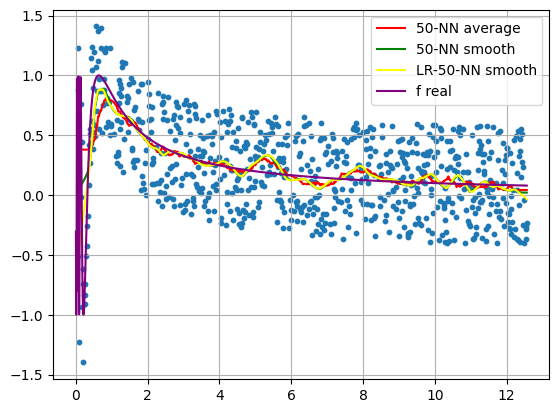

In [142]:
plt.scatter(x,y,s=10)
estimate_neighbors = []

k = int(len(x)/2)
k=50



for x_i in x:
    estimate_neighbors.append(estimator_f_neighbors(x_i,x,y,k))
estimate_neighbors = np.asarray(estimate_neighbors)

estimate_smooth = []


lamda = k

for x_i in x:
    estimate_smooth.append(smooth_estimator_f(x_i,x,y,lamda))
estimate_smooth = np.asarray(estimate_smooth)

lr_estimate_smooth = []


lamda = k

for x_i in x:
    lr_estimate_smooth.append(lr_smooth_estimator_f(x_i,x,y,lamda))
lr_estimate_smooth = np.asarray(lr_estimate_smooth)


plt.plot(x,estimate_neighbors,color='red',label='{}-NN average'.format(k))
plt.plot(x,estimate_smooth,color='green',label='{}-NN smooth'.format(k))
plt.plot(x,lr_estimate_smooth,color='yellow',label='LR-{}-NN smooth'.format(k))
plt.plot(x1,f(x1),color='purple',label='f real')
plt.grid()
plt.legend()
plt.show()

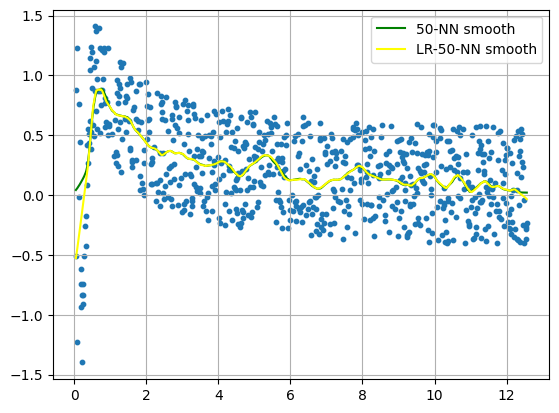

In [145]:
plt.scatter(x,y,s=10)
#plt.plot(x,estimate_neighbors,color='red',label='{}-NN average'.format(k))
plt.plot(x,estimate_smooth,color='green',label='{}-NN smooth'.format(k))
plt.plot(x,lr_estimate_smooth,color='yellow',label='LR-{}-NN smooth'.format(k))
#plt.plot(x1,f(x1),color='purple',label='f real')
plt.grid()
plt.legend()
plt.show()